In [53]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load Dataset:

In [57]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [38]:
print('Shapeof X_Train: ', X_train.shape)
print('Shapeof Y_Train: ', Y_train.shape)
print('Shapeof X_Test: ', X_test.shape)
print('Shapeof Y_Test: ', Y_test.shape)
print("Every image is currently 100x100x3RGB, hence 30000")
X_train[1,:]

Shapeof X_Train:  (2000, 30000)
Shapeof Y_Train:  (2000,)
Shapeof X_Test:  (400, 30000)
Shapeof Y_Test:  (400,)
Every image is currently 100x100x3RGB, hence 30000


array([131., 128., 135., ...,  71.,  96.,  74.])

In [58]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print('Shapeof X_Train: ', X_train.shape)
print('Shapeof Y_Train: ', Y_train.shape)
print('Shapeof X_Test: ', X_test.shape)
print('Shapeof Y_Test: ', Y_test.shape)
X_train[1,:]

Shapeof X_Train:  (2000, 100, 100, 3)
Shapeof Y_Train:  (2000, 1)
Shapeof X_Test:  (400, 100, 100, 3)
Shapeof Y_Test:  (400, 1)


array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

To train the model properly, we need to rescale the rgb values from 0 to 1

In [59]:
X_train = X_train/255.0
#Y_train = Y_train/255.0
X_test = X_test/255.0
#Y_test = Y_test/255.0
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

Now lets look at the images:

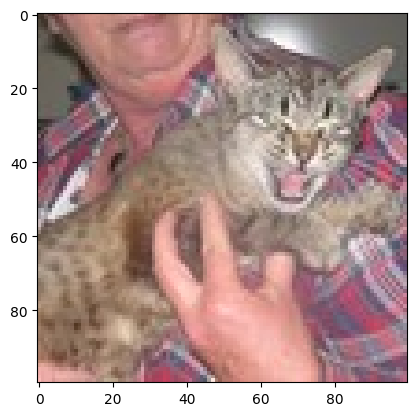

In [60]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

We are done with preparing the dataset, and are ready to start building the model.

In [45]:
model = Sequential(
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1, activation='sigmoid')
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Sequential.__init__() takes from 1 to 4 positional arguments but 8 were given

In [61]:
#Above is one way to define the model we want in keras:
#This is another way:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sequential means the layers will be stacked in a sequence
For Conv2D:
32 is the number of the filters
(3,3) is the size of the filters
activvation function is "relu"
the input shape is the size of the image

For MaxPoolin2D:
(2,2) is the filter size

For the second Conv2D: 
All is the same but we do not need to specify the input shape

Next the nodes are flattened:
using Flatten(),

Next Dense layers are used:
64 is the number of output
the activiation function is relu

A final dense layer is used:
1 is the number of activation neurons
since this is the output layer and we only have 1 output, the sigmoid activation function is used for binary classification.

Now that the model is constructed, we need to implement the back propagation and cost function:

In [62]:
model1.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

There are many loss function, optimizer, and metric options through keras.
To clarify, the metrics parameter defines what we want to optimize for. 

Now, we need to train the model based off our data:

In [63]:
model1.fit(X_train, Y_train, epochs = 5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - accuracy: 0.4851 - loss: 0.8989
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.5023 - loss: 0.6921
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.5129 - loss: 0.6917
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.5991 - loss: 0.6628
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.6475 - loss: 0.6291


Now that the training is done we can test the accuracy:

In [64]:
model1.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6414 - loss: 0.6199


[0.6151081323623657, 0.6549999713897705]

The accuracy for this model is only 64% with a larger data set and tweaking the model we may be able to improve it.

Here is how to make predictions:

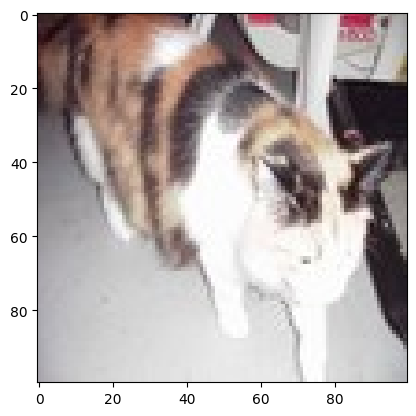

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Our model predicts this is an image of a  dog


In [85]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model1.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Our model predicts this is an image of a ",pred)